**Chapter_2_1**  
**ATMOS 6040: Environmental Statistics**  
**Alex Weech **

Download this notebook and all images and data by downloading the ZIP file from GitHub, or use the git command:

    git clone https://github.com/weech/ATMOS_5040_2019.git
    
> Note: Windows users will have to install [git for Windows](https://gitforwindows.org/) and execute the git command from the PowerShell.

# Using Python modules

`numpy` provides routines to handle arrays and many calculations efficiently and imported by convention as `np`. Numpy functions are very good at handling homogeneous data arrays (and similar in that respect to matlab functions).

`pandas` is really good at handling tabular/array data that may have heterogeneous types (floating and text, for example). It is imported by convention as `pd`. 

There are a couple sets of panda library routines  (`Series`, and `DataFrame`) used so frequently that we'll import those directly too.

`scipy` has a bunch of statistical functions and we'll import `stats` from `scipy`



`pyplot` is a _submodule_ of matplotlib. It is typically imported as the alias `plt` to handle basic plotting

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from scipy import stats
import matplotlib.pyplot as plt

---

# Chapter 2a

# Level of the Great Salt Lake

On GitHub, look in the `data` folder for a file called `gsl_yr.csv` and download it. 

Open the `gsl_yr.csv` file in the Jupyter Lab environment to see the column contents and the units.

- The 0th column is the Year
- The 1st column is the Number of observations
- The 2nd column is the Lake level (in feet)

read 3 column vectors of years, number of observations, and yearly lake level for 1895-2018 period
lake level (in ft)

In [2]:
#read the lake level data
year = np.genfromtxt('../data/gsl_yr.csv', delimiter=',', usecols=0)
#convert lake level to meters
lev = .3048 * np.genfromtxt('../data/gsl_yr.csv', delimiter=',', usecols=2)

In [3]:
print(year)
print(lev)

[1895. 1896. 1897. 1898. 1899. 1900. 1901. 1902. 1903. 1904. 1905. 1906.
 1907. 1908. 1909. 1910. 1911. 1912. 1913. 1914. 1915. 1916. 1917. 1918.
 1919. 1920. 1921. 1922. 1923. 1924. 1925. 1926. 1927. 1928. 1929. 1930.
 1931. 1932. 1933. 1934. 1935. 1936. 1937. 1938. 1939. 1940. 1941. 1942.
 1943. 1944. 1945. 1946. 1947. 1948. 1949. 1950. 1951. 1952. 1953. 1954.
 1955. 1956. 1957. 1958. 1959. 1960. 1961. 1962. 1963. 1964. 1965. 1966.
 1967. 1968. 1969. 1970. 1971. 1972. 1973. 1974. 1975. 1976. 1977. 1978.
 1979. 1980. 1981. 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990.
 1991. 1992. 1993. 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002.
 2003. 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014.
 2015. 2016. 2017. 2018.]
[1280.58672 1280.49528 1280.55624 1280.4648  1280.3124  1280.25144
 1279.91616 1279.30656 1279.21512 1279.33704 1279.18464 1279.30656
 1279.97712 1280.28192 1280.70864 1281.04392 1280.89152 1280.80008
 1280.86104 1281.01344 1280.89152 1280.7696

# Read Utah annual precip and temperature 

convert inches to cm
convert F to C

In [4]:
yearp = np.genfromtxt('../data/utah_precip.csv', delimiter=',', usecols=0)
ppt = 2.54 * np.genfromtxt('../data/utah_precip.csv', delimiter=',', usecols=1)
yeart = np.genfromtxt('../data/utah_temp.csv', delimiter=',', usecols=0)
temp = np.genfromtxt('../data/utah_temp.csv', delimiter=',', usecols=1)
temp = 5. * (temp - 32.)/9.

In [5]:
#print(yearp)
#print(ppt)
#print(yeart)
#print(temp)

# Figure 2.1

Create bar plot time series of lake level, Utah ppt, and Utah temp

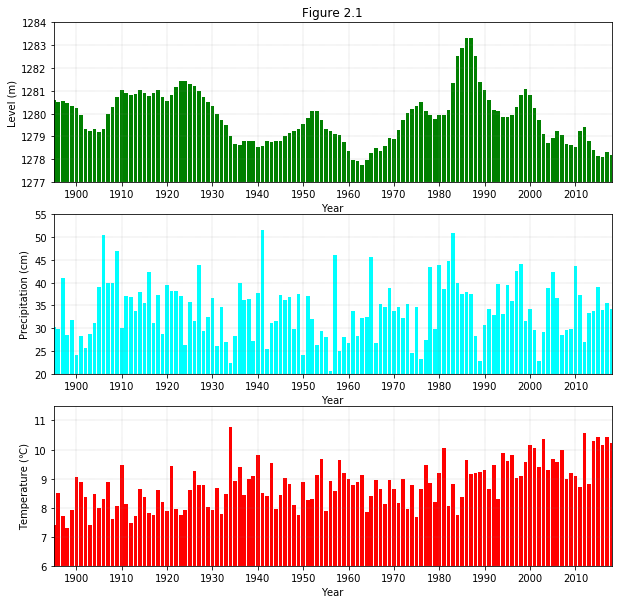

In [6]:
decade_ticks = np.arange(1900,2020,10)
#print("tick marks",decade_ticks)

fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize=(10,10))
ax1.bar(year,lev,color='green')
ax1.set(xlim=(1895,2018),ylim=(1277,1284))
ax1.set(xlabel="Year",ylabel='Level (m)')
ax1.set(xticks=decade_ticks)
ax1.set(title="Figure 2.1")
ax2.bar(year,ppt,color='cyan')
ax2.set(xlim=(1895,2018),ylim=(20,55))
ax2.set(xlabel="Year",ylabel='Precipitation (cm)')
ax2.set(xticks=decade_ticks)
ax3.bar(year,temp,color='red')
ax3.set(xlim=(1895,2018),ylim=(6,11.5))
ax3.set(xlabel="Year",ylabel='Temperature (℃)')
ax3.set(xticks=decade_ticks)

ax1.grid(linestyle='--', color='grey', linewidth=.2)
ax2.grid(linestyle='--', color='grey', linewidth=.2)
ax3.grid(linestyle='--', color='grey', linewidth=.2)

plt.savefig('figure_2.1_2019_python.png')


# Figure 2.2


In [7]:
#sort the values from smallest to largest using numpy
levsort = np.sort(lev)
print(levsort)
#compute the range
range_lev = np.max(lev) - np.min(lev)
print('range',range_lev)

[1277.75208 1277.93496 1277.96544 1277.96544 1278.08736 1278.14832
 1278.1788  1278.27024 1278.3312  1278.36168 1278.36168 1278.39216
 1278.4836  1278.54456 1278.54456 1278.57504 1278.57504 1278.60552
 1278.636   1278.66648 1278.66648 1278.69696 1278.75792 1278.75792
 1278.7884  1278.7884  1278.7884  1278.81888 1278.81888 1278.81888
 1278.81888 1278.87984 1278.9408  1278.9408  1279.00176 1279.03224
 1279.06272 1279.06272 1279.12368 1279.12368 1279.15416 1279.18464
 1279.21512 1279.21512 1279.21512 1279.2456  1279.2456  1279.27608
 1279.30656 1279.30656 1279.33704 1279.33704 1279.33704 1279.398
 1279.51992 1279.5504  1279.7028  1279.7028  1279.73328 1279.73328
 1279.76376 1279.82472 1279.8552  1279.8552  1279.91616 1279.91616
 1279.91616 1279.94664 1279.94664 1279.97712 1279.97712 1280.03808
 1280.09904 1280.12952 1280.12952 1280.12952 1280.16    1280.16
 1280.19048 1280.25144 1280.25144 1280.28192 1280.28192 1280.3124
 1280.3124  1280.3124  1280.4648  1280.49528 1280.49528 1280.49528
 

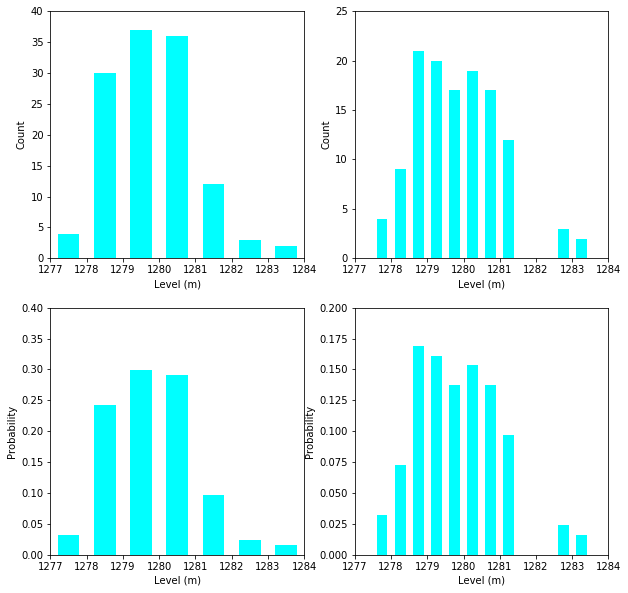

In [8]:
#this will seem odd but the matplotlib hist function doesn't work for noninteger intervals, 
#so using numpy version and then plotting
fig2,ax = plt.subplots(2,2,figsize=(10,10))
x1 = np.arange(1277,1285,1)
hist_val1,bins1 = np.histogram(lev,x1)
width1 = 0.6 * (bins1[1] - bins1[0])
center1 = (bins1[:-1] + bins1[1:]) / 2
ax1 = ax[0,0]
ax1.bar(center1,hist_val1,align='center',width=width1,color='cyan')
ax1.set(xlim=(1277,1284),ylim=(0,40))
ax1.set(xlabel="Level (m)",ylabel='Count')

x2 = np.arange(1277.,1285.01,0.5)
hist_val2,bins2 = np.histogram(lev,x2)
width2 = 0.6 * (bins2[1] - bins2[0])
center2 = (bins2[:-1] + bins2[1:]) / 2
ax2 = ax[0,1]
ax2.bar(center2,hist_val2,align='center',width=width2,color='cyan')
ax2.set(xlim=(1277,1284),ylim=(0,25))
ax2.set(xlabel="Level (m)",ylabel='Count')

#display probabilities
#get total number of values
N = len(lev)
#need to weight each of the values so each one is a probability
weights = np.ones_like(lev)/float(N)
hist_val3,bins3 = np.histogram(lev,x1,weights=weights)
ax3 = ax[1,0]
ax3.bar(center1,hist_val3,align='center',width=width1,color='cyan')
ax3.set(xlim=(1277,1284),ylim=(0,0.4))
ax3.set(xlabel="Level (m)",ylabel='Probability')

hist_val4,bins4 = np.histogram(lev,x2,weights=weights)
ax4 = ax[1,1]
ax4.bar(center2,hist_val4,align='center',width=width2,color='cyan')
ax4.set(xlim=(1277,1284),ylim=(0,0.2))
ax4.set(xlabel="Level (m)",ylabel='Probability')


plt.savefig('figure_2.2_2019_python.png')


# Figure 2.3

Cumulative probability distribution

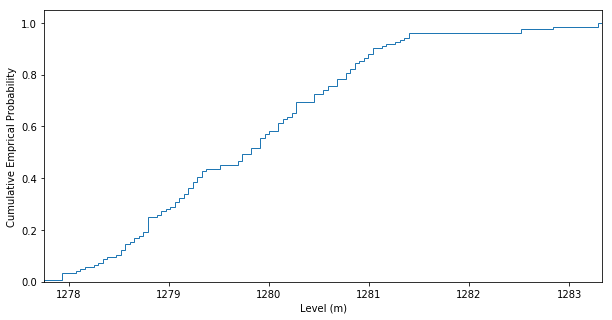

In [9]:
# plot the cumulative histogram
fig3,ax = plt.subplots(1,1,figsize=(10,5))
n_bins = 124
n, bins, patches = ax.hist(lev, n_bins, density='True', histtype='step',
                           cumulative=True, label='Empirical')
ax.set(xlabel="Level (m)",ylabel='Cumulative Emprical Probability')
ax.set(xlim=(min(lev),max(lev)))


plt.savefig('figure_2.3_2019_python.png')



# Figure 2.4 Boxplot

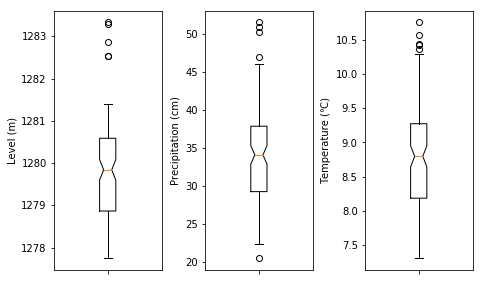

In [10]:

#fig4,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(10,4))
fig = plt.figure(1)
ax1 = fig.add_axes([.05, .05, .25, .9])
ax2 = fig.add_axes([.40, .05, .25, .9])
ax3 = fig.add_axes([.77, .05, .25, .9])
#whiskers are different in python (75th percentile + wis *IQR, for example)
# in matlab 1.5 *IQR + median
ax1.boxplot(lev,notch=True,whis=1)
ax1.set(xticklabels=" ",ylabel='Level (m)')

ax2.boxplot(ppt,notch=True,whis=1)
ax2.set(xticklabels=' ',ylabel="Precipitation (cm)")

ax3.boxplot(temp,notch=True,whis=1)
ax3.set(xticklabels=' ', ylabel="Temperature (℃)")

plt.savefig('figure_2.4_2019_python.png')

#Note: the length of the whiskers is computed differently in numpy boxplot than in Matlab


# Measures of central tendency

We will use a mix of scipy stats and pandas routines to illustrate the basic statistical commands.


In [11]:
# create one 3 column array for all 3 variables of length N years
array = np.ones((N,3),dtype=np.float_)
array[:,0] = lev
array[:,1] = ppt
array[:,2] = temp


In [12]:
print(array)

[[1280.58672      30.226         7.40722222]
 [1280.49528      29.9466        8.49555556]
 [1280.55624      40.9194        7.70388889]
 [1280.4648       28.6004        7.30555556]
 [1280.3124       31.7754        7.90722222]
 [1280.25144      24.0538        9.05555556]
 [1279.91616      28.2702        8.89333333]
 [1279.30656      25.7302        8.37944444]
 [1279.21512      28.702         7.38888889]
 [1279.33704      31.0642        8.48166667]
 [1279.18464      39.0652        7.98166667]
 [1279.30656      50.3174        8.28222222]
 [1279.97712      40.005         8.89833333]
 [1280.28192      39.8018        7.61555556]
 [1280.70864      46.9646        8.065     ]
 [1281.04392      29.9974        9.46277778]
 [1280.89152      37.0586        8.12944444]
 [1280.80008      36.8554        7.47666667]
 [1280.86104      33.7312        7.71277778]
 [1281.01344      37.846         8.65277778]
 [1280.89152      35.5346        8.36555556]
 [1280.7696       42.3672        7.81944444]
 [1280.922

# Using pandas DataFrame
Documentation on pandas:
http://pandas.pydata.org/pandas-docs/stable/

How to load indices and data into a DataFrame

In [13]:
df = pd.DataFrame(array, index=year.astype(str),columns=['Great Salt Lake Level','Utah Precipitation','Utah Temperature'])


In [14]:
#Pthyon notebooks display frames as html tables
df

,Great Salt Lake Level,Utah Precipitation,Utah Temperature
1895.0,1280.58672,30.2260,7.407222
1896.0,1280.49528,29.9466,8.495556
1897.0,1280.55624,40.9194,7.703889
1898.0,1280.46480,28.6004,7.305556
1899.0,1280.31240,31.7754,7.907222
1900.0,1280.25144,24.0538,9.055556
1901.0,1279.91616,28.2702,8.893333
1902.0,1279.30656,25.7302,8.379444
1903.0,1279.21512,28.7020,7.388889
1904.0,1279.33704,31.0642,8.481667


In [15]:
#some basic info + output precentiles
basic_vals = df.describe(percentiles=[.01,.10,.25,.33,.50,.66,.75,.90,.99])
print(basic_vals)

       Great Salt Lake Level  Utah Precipitation  Utah Temperature
count             124.000000          124.000000        124.000000
mean             1279.819312           34.068569          8.800018
std                 1.140610            6.368632          0.780497
min              1277.752080           20.548600          7.305556
1%               1277.941970           22.527514          7.393106
10%              1278.501888           26.347420          7.790278
25%              1278.864600           29.279850          8.182778
33%              1279.172143           30.570678          8.414844
50%              1279.839960           34.112200          8.796389
66%              1280.281920           36.887404          9.089478
75%              1280.586720           37.884100          9.274306
90%              1281.065256           42.456100          9.851722
99%              1283.201294           50.767234         10.539672
max              1283.329920           51.536600         10.75

# Basic pandas descriptive statistics
https://pandas.pydata.org/pandas-docs/stable/basics.html#descriptive-statistics

#useful panda info
https://jeffdelaney.me/blog/useful-snippets-in-pandas/


In [16]:
#In what year did the min values happen?
df.idxmin()

Great Salt Lake Level    1963.0
Utah Precipitation       1956.0
Utah Temperature         1898.0
dtype: object

In [17]:
#In what year did the max values happen?
df.idxmax()

Great Salt Lake Level    1986.0
Utah Precipitation       1941.0
Utah Temperature         1934.0
dtype: object

In [18]:
modes = stats.mode(array,axis=0)
print(modes)

ModeResult(mode=array([[1278.81888   ,   32.3088    ,    7.96277778]]), count=array([[4, 2, 2]]))


In [19]:
#compute mean of the values between the 10th and 90th percentile in the sample
xbar_trim = stats.trim_mean(array,0.1)
print('Trimmed mean',xbar_trim)

Trimmed mean [1279.7610168    33.81883       8.76438333]


In [20]:
#compute interquartile ranges
iqr_var=stats.iqr(array,axis=0)
print('IQR',iqr_var)

IQR [1.72212    8.60425    1.09152778]


In [21]:
#median absolute deviation
df.mad()

Great Salt Lake Level    0.926286
Utah Precipitation       5.138789
Utah Temperature         0.629731
dtype: float64

# Illustrating robust and reliant central tendency metrics
%put in a bad value

In [22]:
#put in one bad value
array_wbad = np.ones((N,3),dtype=np.float_)
array_wbad[:,0] = lev
array_wbad[:,1] = ppt
array_wbad[:,2] = temp

array_wbad[1,:] = -9999
xbar_wbad = np.mean(array_wbad,axis=0);
xmed_wbad = np.median(array_wbad,axis=0);
xbar_trim_wbad = stats.trim_mean(array_wbad,0.1);
print('mean',xbar_wbad)
print('median',xmed_wbad)
print('trimmed_mean',xbar_trim_wbad)

mean [1188.85564065  -46.81003226  -71.9055914 ]
median [1279.79424      34.1122        8.79638889]
trimmed_mean [1279.7399856    33.781238      8.75702222]


In [23]:
# unbiased estimate of pop standard deviation and variance
std0 = np.std(array,ddof=1,axis=0)
var0 = np.var(array,ddof=1,axis=0)
# sample standard deviation and variance
std1 = np.std(array,axis=0)
var1 = np.var(array,axis=0)
print('pop standard deviation and variance',std0,var0)
print('sample standard deviation and variance',std1,var1)

pop standard deviation and variance [1.14060981 6.36863201 0.78049722] [ 1.30099073 40.55947367  0.60917592]
sample standard deviation and variance [1.13600126 6.34290006 0.77734369] [ 1.29049887 40.23238114  0.60426321]


In [24]:
#skewness
skew = stats.skew(array,axis=0)
print('skewness',skew)

skewness [0.60493347 0.34543439 0.31201076]


# Anomalies


In [25]:
#sample means
xbar= np.mean(array,axis=0)
array_a = array - xbar;
print(array_a)

[[ 7.67407742e-01 -3.84256935e+00 -1.39279570e+00]
 [ 6.75967742e-01 -4.12196935e+00 -3.04462366e-01]
 [ 7.36927742e-01  6.85083065e+00 -1.09612903e+00]
 [ 6.45487742e-01 -5.46816935e+00 -1.49446237e+00]
 [ 4.93087742e-01 -2.29316935e+00 -8.92795699e-01]
 [ 4.32127742e-01 -1.00147694e+01  2.55537634e-01]
 [ 9.68477419e-02 -5.79836935e+00  9.33154122e-02]
 [-5.12752258e-01 -8.33836935e+00 -4.20573477e-01]
 [-6.04192258e-01 -5.36656935e+00 -1.41112903e+00]
 [-4.82272258e-01 -3.00436935e+00 -3.18351254e-01]
 [-6.34672258e-01  4.99663065e+00 -8.18351254e-01]
 [-5.12752258e-01  1.62488306e+01 -5.17795699e-01]
 [ 1.57807742e-01  5.93643065e+00  9.83154122e-02]
 [ 4.62607742e-01  5.73323065e+00 -1.18446237e+00]
 [ 8.89327742e-01  1.28960306e+01 -7.35017921e-01]
 [ 1.22460774e+00 -4.07116935e+00  6.62759857e-01]
 [ 1.07220774e+00  2.99003065e+00 -6.70573477e-01]
 [ 9.80767742e-01  2.78683065e+00 -1.32335125e+00]
 [ 1.04172774e+00 -3.37369355e-01 -1.08724014e+00]
 [ 1.19412774e+00  3.77743065e+

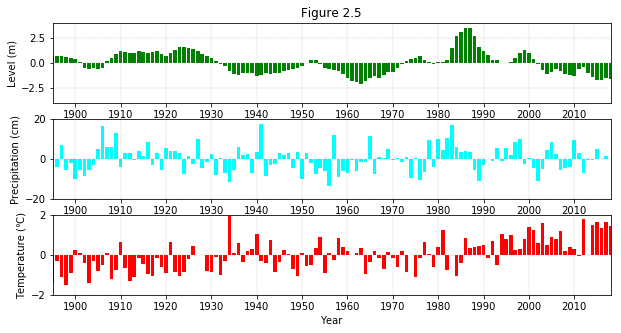

In [26]:
fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize=(10,5))
ax1.bar(year,array_a[:,0],color='green')
ax1.set(xlim=(1895,2018),ylim=(-4,4))
ax1.set(xlabel="Year",ylabel='Level (m)')
ax1.set(xticks=decade_ticks)
ax1.set(title="Figure 2.5")
ax2.bar(year,array_a[:,1],color='cyan')
ax2.set(xlim=(1895,2018),ylim=(-20,20))
ax2.set(xlabel="Year",ylabel='Precipitation (cm)')
ax2.set(xticks=decade_ticks)
ax3.bar(year,array_a[:,2],color='red')
ax3.set(xlim=(1895,2018),ylim=(-2,2))
ax3.set(xlabel="Year",ylabel='Temperature (℃)')
ax3.set(xticks=decade_ticks)

ax1.grid(linestyle='--', color='grey', linewidth=.2)
ax2.grid(linestyle='--', color='grey', linewidth=.2)
ax3.grid(linestyle='--', color='grey', linewidth=.2)

plt.savefig('figure_2.5_2019_python.png')

# 1981-2010 climate normal
define climate normal for 1981-2010 period. find those years
cyr_beg = find(year == 1981);
cyr_end = find(year == 2010);

cnorm = mean(array(cyr_beg:cyr_end,:));
cnorm_array = ones(ny,1)*cnorm;
array_cna = array - cnorm;

figure(7);
for i=1:3
subplot(3,1,i);
bar(year,array_cna(:,i), colors(i));
axis([axis_val(i,:)])
set(gca,'XTick',decade_ticks);
set(gca,'XTickLabel',decade_labels);
grid on
xlabel(xlabels(i));
ylabel(ylabels(i));
end


In [27]:
# define climate normal for 1981-2010 period. find the range of values during those years
#pandas handles these by index values
clim_period=df.loc['1981':'2010']
#print(clim_period)
cnorm = np.mean(clim_period)
print(cnorm)
df_cna = df - cnorm;
print(df_cna)

Great Salt Lake Level    1280.492127
Utah Precipitation         35.321766
Utah Temperature            9.296418
dtype: float64
        Great Salt Lake Level  Utah Precipitation  Utah Temperature
1895.0               0.094593           -5.095766         -1.889195
1896.0               0.003153           -5.375166         -0.800862
1897.0               0.064113            5.597634         -1.592529
1898.0              -0.027327           -6.721366         -1.990862
1899.0              -0.179727           -3.546366         -1.389195
1900.0              -0.240687          -11.267966         -0.240862
1901.0              -0.575967           -7.051566         -0.403084
1902.0              -1.185567           -9.591566         -0.916973
1903.0              -1.277007           -6.619766         -1.907529
1904.0              -1.155087           -4.257566         -0.814751
1905.0              -1.307487            3.743434         -1.314751
1906.0              -1.185567           14.995634         

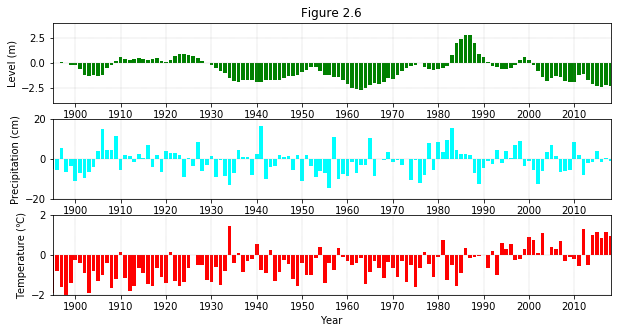

In [28]:
fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize=(10,5))
ax1.bar(year,df_cna['Great Salt Lake Level'],color='green')
ax1.set(xlim=(1895,2018),ylim=(-4,4))
ax1.set(xlabel="Year",ylabel='Level (m)')
ax1.set(xticks=decade_ticks)
ax1.set(title="Figure 2.6")
ax2.bar(year,df_cna['Utah Precipitation'],color='cyan')
ax2.set(xlim=(1895,2018),ylim=(-20,20))
ax2.set(xlabel="Year",ylabel='Precipitation (cm)')
ax2.set(xticks=decade_ticks)
ax3.bar(year,df_cna['Utah Temperature'],color='red')
ax3.set(xlim=(1895,2018),ylim=(-2,2))
ax3.set(xlabel="Year",ylabel='Temperature (℃)')
ax3.set(xticks=decade_ticks)

ax1.grid(linestyle='--', color='grey', linewidth=.2)
ax2.grid(linestyle='--', color='grey', linewidth=.2)
ax3.grid(linestyle='--', color='grey', linewidth=.2)

plt.savefig('figure_2.6_2019_python.png')

# Handling Monthly Great Salt Lake Level

salt lake level begins in 1903 through 2018
create 2d array levm for processing
rows are years and columns are months
dates will be the midpoint of the month


In [29]:
#read the Monthly lake level data
yearm = np.genfromtxt('../data/gsl_monthly.csv', delimiter=',', usecols=0)
nym = int(max(yearm) - min(yearm))+1
print(np.size(yearm))
monm = np.genfromtxt('../data/gsl_monthly.csv', delimiter=',', usecols=1)
#convert lake level to meters
levmon = .3048 * np.genfromtxt('../data/gsl_monthly.csv', delimiter=',', usecols=2)
#get midpoint of each month as the date
datemon =  yearm+(monm-0.5)/12.;

1392


In [30]:
#convert from vector to 2D array with rows years and columns months
levm = levmon.reshape((nym,12))
datem = datemon.reshape((nym,12))
#print(levm)
#print(datem)

[1279.68427026 1279.75932989 1279.85977988 1279.95109639 1280.0157245
 1280.03407556 1279.95926292 1279.81002391 1279.66689141 1279.58520238
 1279.57633428 1279.61202215]
[1.17872268 1.17455254 1.16278339 1.16079602 1.15969198 1.17142598
 1.17221846 1.18457772 1.18831    1.18749246 1.19527963 1.19356331]


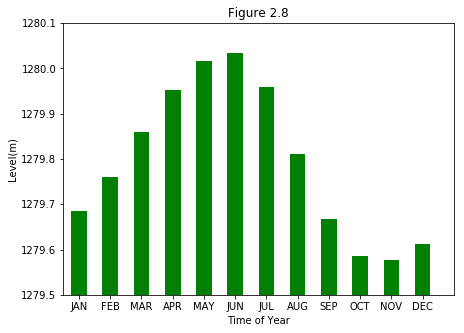

In [31]:
#compute monthly mean and sample standard deviation for each month over all years

mean_m = np.mean(levm,axis=0);
sx_m = np.std(levm,axis=0);
print(mean_m)
print(sx_m)

#plot monthly mean;
xb = np.arange(0.5,12.5,1)
fig8,ax8 = plt.subplots(1,1,figsize=(7,5))
ax8.bar(xb,mean_m,color='g',align='center',width=0.5)
ax8.set(xlabel="Time of Year",ylabel='Level(m)')
ax8.set(xlim=(0,12.5),ylim=(1279.5,1280.1)) 
ax8.set(xticks=xb,xticklabels=['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'])
ax8.ticklabel_format(axis='y',style='plain',useOffset=False)
ax8.set(title="Figure 2.8")
plt.savefig('figure_2.8_2019.png')


In [32]:
#compute anomalies from monthly means
levm_a = levm - mean_m;
nom = np.size(levm_a)
levma = levm_a.reshape(nom)
#compute standardized anomalies
z = levm_a/sx_m;
za = z.reshape(nom)
#print(levma)
#print(za)
#print(np.shape(za))

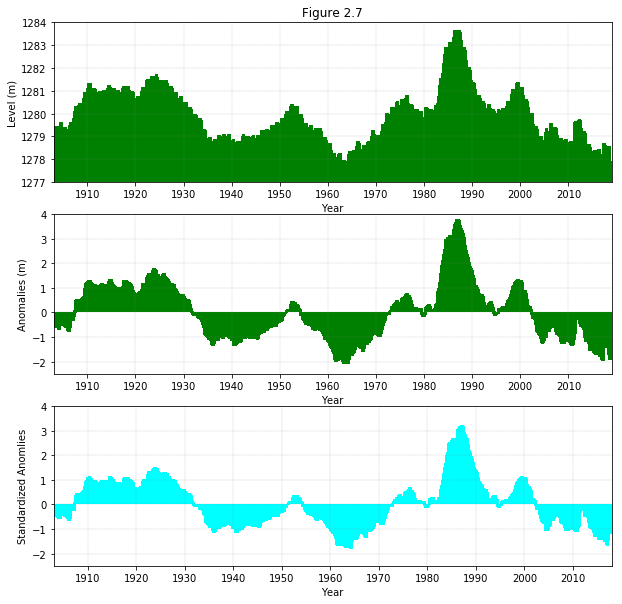

In [33]:
fig7,(ax1,ax2,ax3) = plt.subplots(3,1,figsize=(10,10))
decade_ticks = np.arange(1910,2020,10)
ax1.bar(datemon,levmon,color='green')
ax1.set(xlim=(1903,2019),ylim=(1277,1284))
ax1.set(xlabel="Year",ylabel='Level (m)')
ax1.set(xticks=decade_ticks)
ax1.set(title="Figure 2.7")
ax2.bar(datemon,levma,color='green')
ax2.set(xlim=(1903,2019),ylim=(-2.5,4))
ax2.set(xlabel="Year",ylabel='Anomalies (m)')
ax2.set(xticks=decade_ticks)
ax3.bar(datemon,za,color='cyan')
ax3.set(xlim=(1903,2018),ylim=(-2.5,4))
ax3.set(xlabel="Year",ylabel='Standardized Anomlies')
ax3.set(xticks=decade_ticks)

ax1.grid(linestyle='--', color='grey', linewidth=.2)
ax2.grid(linestyle='--', color='grey', linewidth=.2)
ax3.grid(linestyle='--', color='grey', linewidth=.2)

plt.savefig('figure_2.7_2019.png')



1392
[-0.44973281 -0.4633338  -0.52819802 ... -1.56935934 -1.52621549
 -1.53277345]


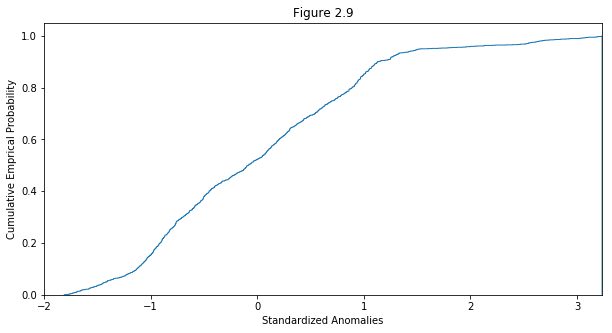

In [37]:
# CDF of monthly lake level
fig9,ax = plt.subplots(1,1,figsize=(10,5))
print(nom)
print(za)
n, bins, patches = ax.hist(za, nom, density='True', histtype='step',
                           cumulative=True, label='Empirical')
ax.set(xlabel="Standardized Anomalies",ylabel='Cumulative Emprical Probability')
ax.set(xlim=(-2,max(za)))
ax.set_title("Figure 2.9")

plt.savefig('figure_2.9_2019.png')

# Mean and Median smoothers
One way is to use pandas built in functions to handle. 
These are the sorts of things pandas is intended to handle

In [35]:
#first get anomalies for Utah Precipitation only just for convenience as a Series
ppt_vals= df['Utah Precipitation']
ppt_climo = np.mean(ppt_vals)
ppt_a = ppt_vals - ppt_climo
#window is how many values to roll over and compute mean or median
window = 3
#iter is number of iterations to repeat
iter = 5
#do the first ones
vals_mean=ppt_a.rolling(window,center=True).mean()
vals_median=ppt_a.rolling(window,center=True).median()
for ival in range(0,iter-1):
    #reset the first and last values to the original data
    vals_mean[[0]]=ppt_a.iloc[[0]]
    vals_mean[[-1]]=ppt_a.iloc[[-1]]
    vals_median[[0]]=ppt_a.iloc[[0]]
    vals_median[[-1]]=ppt_a.iloc[[-1]]
    vals_mean=vals_mean.rolling(window,center=True).mean()
    vals_median=vals_median.rolling(window,center=True).median()
# replace first and last values for final pass
vals_mean[[0]]=ppt_a.iloc[[0]]
vals_mean[[-1]]=ppt_a.iloc[[-1]]
vals_median[[0]]=ppt_a.iloc[[0]]
vals_median[[-1]]=ppt_a.iloc[[-1]]

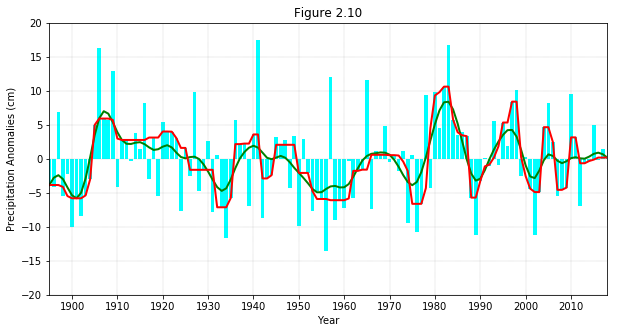

In [36]:
# plot Utah precipitation with mean and medians superimposed
decade_ticks = np.arange(1900,2020,10)
fig10, ax = plt.subplots(1,1,figsize=(10,5))
ax.bar(year,array_a[:,1],color='cyan')
ax.plot(year,vals_mean.values,color='green',linewidth=2);
ax.plot(year,vals_median.values,color='red',linewidth=2);
ax.set(xlim=(1895,2018),ylim=(-20,20))
ax.set(xlabel="Year",ylabel='Precipitation Anomalies (cm)')
ax.set(xticks=decade_ticks)
ax.grid(linestyle='--', color='grey', linewidth=.2)
ax.set_title("Figure 2.10")
plt.savefig('figure_2.10_2019_python.png')